# Previsão com séries temporais (ARIMA)


In [16]:
# Importação das bibliotecas
import pandas as pd
import matplotlib.pylab as plt
from statsmodels.tsa.arima.model import ARIMA
from pmdarima.arima import auto_arima
from os import path
from datetime import datetime
# registro de converters para uso do matplotlib
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()


In [17]:
# Carregamento da base de dados, conversão do atributo para data e criação da série temporal (ts)
base = pd.read_csv(path.join("..", "data", "AirPassengers.csv"))
def dateparse(dates): 
    return datetime.strptime(dates, '%Y-%m')


base = pd.read_csv(path.join("..", "data", "AirPassengers.csv"), parse_dates=['Month'],
                   index_col='Month', date_parser=dateparse)
ts = base['#Passengers']


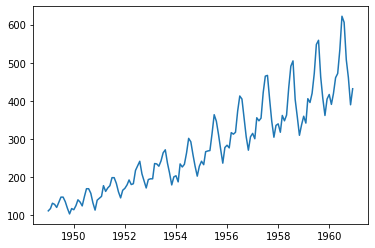

In [18]:
# Visualização da série temporal completa
plt.plot(ts)


In [19]:
# Criação do modelo ARIMA com os parâmetro p = 2, q = 1, d = 2, treinamento e visualização dos resultados
# Mais detalhes sobre o parâmetro freq: https://stackoverflow.com/questions/49547245/valuewarning-no-frequency-information-was-provided-so-inferred-frequency-ms-wi
modelo = ARIMA(ts, order=(2, 1, 2), freq=ts.index.inferred_freq)
modelo_treinado = modelo.fit()
modelo_treinado.summary()


/home/bruno/projects/data-science/venv/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/home/bruno/projects/data-science/venv/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:            #Passengers   No. Observations:                  144
Model:                 ARIMA(2, 1, 2)   Log Likelihood                -671.673
Date:                Wed, 08 Jun 2022   AIC                           1353.347
Time:                        08:22:21   BIC                           1368.161
Sample:                    01-01-1949   HQIC                          1359.366
                         - 12-01-1960                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.6850      0.020     83.061      0.000       1.645       1.725
ar.L2         -0.9549      0.017    -55.420      0.000      -0.989      -0.921
ma.L1         -1.8432      0.124    -14.845      0.000      -2.087      -1.600
ma.L2          0.9953      0.135      7.398      0.000       0.732       1.259
sigma2       665.9646    113.887      5.848      0.000     442.751     889.178
===================================================================================
Ljung-Box (L1) (Q):                   0.30   Jarque-Bera (JB):                 1.84
Prob(Q):                              0.59   Prob(JB):                         0.40
Heteroskedasticity (H):               7.38   Skew:                             0.27
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.14
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [20]:
# Previsões de 12 datas no futuro
previsoes = modelo_treinado.forecast(steps=12)[0]
previsoes


439.8545131561977

1960-01-01    398.194780
1960-02-01    424.816978
1960-03-01    416.245669
1960-04-01    452.658330
1960-05-01    492.451801
                 ...    
1969-09-01    502.120198
1969-10-01    500.269784
1969-11-01    500.142822
1969-12-01    501.695760
1970-01-01    504.433727
Freq: MS, Name: predicted_mean, Length: 121, dtype: float64

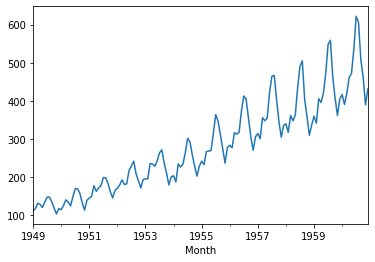

In [21]:
# Criação de eixo para a série temporal completa, com adição das previsões do modelo
# lot_insample = True dados originais
eixo = ts.plot()
modelo_treinado.predict('1960-01-01', '1970-01-01',
                             ax=eixo, plot_insample=True)


In [22]:
# Implementação do auto arima para descoberta automática dos parâmetros
modelo_auto = auto_arima(ts, m=12, seasonal=True, trace=False)
modelo_auto.summary()
# Warning abaixo são normais, de acordo com o link abaixo
# ConvergenceWarning: Maximum... https://github.com/statsmodels/statsmodels/issues/6157


<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                  144
Model:             SARIMAX(2, 1, 1)x(0, 1, [], 12)   Log Likelihood                -504.923
Date:                             Wed, 08 Jun 2022   AIC                           1017.847
Time:                                     08:22:31   BIC                           1029.348
Sample:                                          0   HQIC                          1022.520
                                             - 144                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5960      0.085      6.987      0.000       0.429       0.763
ar.L2          0.2143      0.091      2.343      0.019       0.035       0.394
ma.L1         -0.9819      0.038    -25.601      0.000      -1.057      -0.907
sigma2       129.3132     14.556      8.884      0.000     100.783     157.843
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 7.68
Prob(Q):                              0.98   Prob(JB):                         0.02
Heteroskedasticity (H):               2.33   Skew:                            -0.01
Prob(H) (two-sided):                  0.01   Kurtosis:                         4.19
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [23]:
proximos_12 = modelo_auto.predict(n_periods=12)
# Visualização dos próximos 12 valores
proximos_12


array([445.63493355, 420.39502446, 449.19834797, 491.83997601,
       503.39450237, 566.86247078, 654.2601892 , 638.5974932 ,
       540.88373892, 494.12660991, 423.33269015, 465.50754991])